In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import time

In [26]:
text_data = pd.read_json('data/News_Category_Dataset_v3.json', lines = True)
text_data

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [27]:
text_data = text_data.drop(columns = ['link', 'authors', 'date'])

In [28]:
text_data['desc_with_headline'] = text_data['headline'] + text_data['short_description']
text_data

,headline,category,short_description,desc_with_headline
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,Over 4 Million Americans Roll Up Sleeves For O...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,"American Airlines Flyer Charged, Banned For Li..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",23 Of The Funniest Tweets About Cats And Dogs ...
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",The Funniest Tweets From Parents This Week (Se...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Woman Who Called Cops On Black Bird-Watcher Lo...
...,...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",Maria Sharapova Stunned By Victoria Azarenka I...
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...","Giants Over Patriots, Jets Over Colts Among M..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [29]:
text_data.isnull().any()

headline              False
category              False
short_description     False
desc_with_headline    False
dtype: bool

In [30]:
text_data['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [31]:
print(f'Number of classes: {len(text_data["category"].unique())}')

Number of classes: 42


In [32]:
text_data['encoded_category'] = LabelEncoder().fit_transform(text_data['category'])

In [33]:
text_data

,headline,category,short_description,desc_with_headline,encoded_category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,Over 4 Million Americans Roll Up Sleeves For O...,35
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,"American Airlines Flyer Charged, Banned For Li...",35
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",23 Of The Funniest Tweets About Cats And Dogs ...,5
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",The Funniest Tweets From Parents This Week (Se...,22
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Woman Who Called Cops On Black Bird-Watcher Lo...,35
...,...,...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,32
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",Maria Sharapova Stunned By Victoria Azarenka I...,28
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...","Giants Over Patriots, Jets Over Colts Among M...",28
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,Aldon Smith Arrested: 49ers Linebacker Busted ...,28


In [34]:
text_data = text_data[text_data['short_description'] != ''].reset_index(drop = True)

In [35]:
from src.classes import TextDataset
from torch.utils.data import DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer  
import torch
import torchtext
torchtext.disable_torchtext_deprecation_warning()
import matplotlib.pyplot as plt

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [37]:
dataset = TextDataset(data = text_data['desc_with_headline'], targets = text_data['encoded_category'])
tokenizer = get_tokenizer(tokenizer = 'basic_english')

In [38]:
dataset.__len__()

189815

In [39]:
def tokenize(iterable):
    for i in range(len(iterable)):
        yield tokenizer(iterable[i][0])

vocab = build_vocab_from_iterator(tokenize(iterable = dataset))

In [40]:
pipe = lambda x: vocab(tokenizer(x))

def collate_batch(batch):
    text_list, label_list, offset_list = [], [], []
    for text, label in batch:
        processed_text = torch.tensor(pipe(text), dtype = torch.int64)
        text_list.append(processed_text)
        label_list.append(label)
        offset_list.append(processed_text.size(0))
    offset_list = torch.tensor(offset_list)
    padded_text_list = pad_sequence(text_list, batch_first = True)
    label_list = torch.tensor(label_list)
    return padded_text_list.to(device), label_list.to(device), offset_list.to(device)

train_length = int(0.9 * len(text_data))
test_length = len(text_data) - train_length
train_set, valid_set = random_split(dataset = dataset, lengths = [train_length, test_length])

train_dls = DataLoader(dataset = dataset, batch_size = 128, collate_fn = collate_batch, shuffle = True)
valid_dls = DataLoader(dataset = valid_set, batch_size = 128, collate_fn = collate_batch, shuffle = True)

In [41]:
text, label, length = next(iter(train_dls))

In [42]:
print(f'Features shape: {text.shape}, data type: {text.dtype}')
print(f'Labels shape: {label.shape}, data type: {label.dtype}')
print(f'Offset shape: {length.shape}, data type: {length.dtype}')

Features shape: torch.Size([128, 108]), data type: torch.int64
Labels shape: torch.Size([128]), data type: torch.int64
Offset shape: torch.Size([128]), data type: torch.int64


<h2>Classification with PyTorch</h2>

In [51]:
from src.classes import TextClassifier
from torchinfo import summary
import torch.optim as optim
import torch.nn as nn

In [52]:
def train_model(dls, clf, opt, loss_fn):
    clf.train()
    total_acc, total_loss = 0.0, 0.0
    for data, label, length in dls:
        opt.zero_grad()
        pred = clf(data, length)
        loss = loss_fn(pred, label)
        loss.backward()
        opt.step()
        total_acc += (pred.argmax(1) == label).sum().item()
        total_loss += loss.item() * label.size(0)
    
    return total_acc / len(dls.dataset), total_loss / len(dls.dataset)

def evaluate_model(dls, clf, loss_fn):
    clf.eval()
    total_acc, total_loss = 0.0, 0.0
    with torch.no_grad():
        for data, label, length in dls:
            pred = clf(data, length)
            loss = loss_fn(pred, label)
            total_acc += (pred.argmax(1) == label).sum().item()
            total_loss += loss.item() * label.size(0)
            
    return total_acc / len(dls.dataset), total_loss / len(dls.dataset)

<h4>Recurrent Neural Network</h4>

In [53]:
rnn = TextClassifier(vocab_size = len(vocab), embed_dim = 100, hidden_size = 32, output_size = 42, num_layers = 1, type_rnn = 'rnn').to(device)
loss_func = nn.CrossEntropyLoss()

In [56]:
train_losses, train_accuracies, valid_losses, valid_accuracies = [], [], [], []
for epoch in range(20):
    start = time.time()

    train_acc, train_loss = train_model(dls = train_dls, clf = rnn, opt = optim.Adam(params = rnn.parameters()), loss_fn = loss_func)
    valid_acc, valid_loss = evaluate_model(dls = valid_dls, clf = rnn, loss_fn = loss_func)

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)
    valid_accuracies.append(valid_acc)
    valid_losses.append(valid_loss)

    end = time.time()

    print(f'Epoch: {epoch + 1} train_acc: {train_acc:.3f} train_loss: {train_loss:.3f} valid_acc: {valid_acc:.3f} valid_loss: {valid_loss:.3f} time: {end - start:.3f} seconds')

Epoch: 1 train_acc: 0.185 train_loss: 3.213 valid_acc: 0.235 valid_loss: 3.008 time: 29.780 seconds
Epoch: 2 train_acc: 0.246 train_loss: 2.948 valid_acc: 0.259 valid_loss: 2.845 time: 29.597 seconds
Epoch: 3 train_acc: 0.278 train_loss: 2.792 valid_acc: 0.298 valid_loss: 2.680 time: 30.367 seconds
Epoch: 4 train_acc: 0.299 train_loss: 2.707 valid_acc: 0.318 valid_loss: 2.594 time: 30.371 seconds
Epoch: 5 train_acc: 0.319 train_loss: 2.610 valid_acc: 0.314 valid_loss: 2.604 time: 30.373 seconds
Epoch: 6 train_acc: 0.335 train_loss: 2.537 valid_acc: 0.315 valid_loss: 2.590 time: 30.393 seconds
Epoch: 7 train_acc: 0.347 train_loss: 2.469 valid_acc: 0.353 valid_loss: 2.404 time: 30.438 seconds
Epoch: 8 train_acc: 0.362 train_loss: 2.390 valid_acc: 0.374 valid_loss: 2.312 time: 30.321 seconds
Epoch: 9 train_acc: 0.373 train_loss: 2.335 valid_acc: 0.385 valid_loss: 2.248 time: 30.223 seconds
Epoch: 10 train_acc: 0.363 train_loss: 2.385 valid_acc: 0.337 valid_loss: 2.461 time: 30.337 seconds

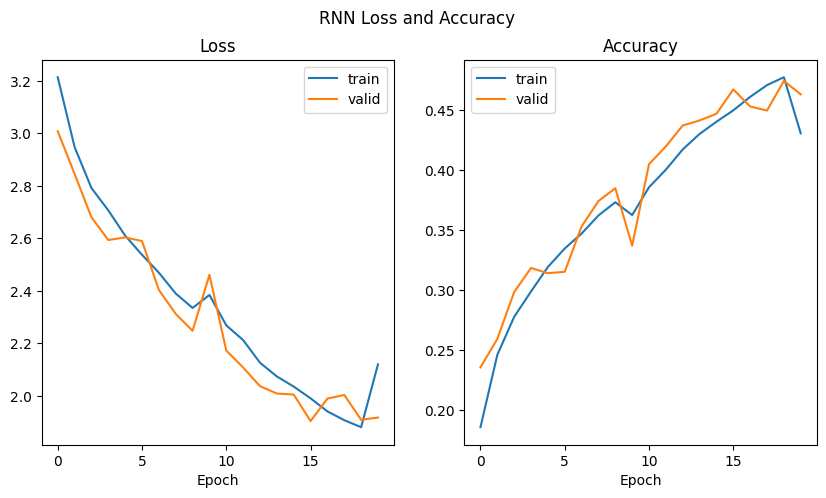

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle("RNN Loss and Accuracy")
ax1.plot(train_losses, label = "train")
ax1.plot(valid_losses, label = "valid")
ax1.title.set_text("Loss")
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(train_accuracies, label = "train")
ax2.plot(valid_accuracies, label = "valid")
ax2.title.set_text("Accuracy")
ax2.set_xlabel("Epoch")
ax2.legend()

<h4>Gated Recurrent Unit</h4>

In [60]:
gru = TextClassifier(vocab_size = len(vocab), embed_dim = 100, hidden_size = 32, output_size = 42, num_layers = 1, type_rnn = 'gru').to(device)
loss_func = nn.CrossEntropyLoss()

In [62]:
train_losses, train_accuracies, valid_losses, valid_accuracies = [], [], [], []
for epoch in range(20):
    start = time.time()

    train_acc, train_loss = train_model(dls = train_dls, clf = gru, opt = optim.Adam(params = gru.parameters()), loss_fn = loss_func)
    valid_acc, valid_loss = evaluate_model(dls = valid_dls, clf = gru, loss_fn = loss_func)

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)
    valid_accuracies.append(valid_acc)
    valid_losses.append(valid_loss)

    end = time.time()

    print(f'Epoch: {epoch + 1} train_acc: {train_acc:.3f} train_loss: {train_loss:.3f} valid_acc: {valid_acc:.3f} valid_loss: {valid_loss:.3f} time: {end - start:.3f} seconds')

Epoch: 1 train_acc: 0.459 train_loss: 2.069 valid_acc: 0.522 valid_loss: 1.815 time: 30.872 seconds
Epoch: 2 train_acc: 0.540 train_loss: 1.726 valid_acc: 0.584 valid_loss: 1.539 time: 33.660 seconds
Epoch: 3 train_acc: 0.591 train_loss: 1.501 valid_acc: 0.637 valid_loss: 1.325 time: 34.029 seconds
Epoch: 4 train_acc: 0.637 train_loss: 1.312 valid_acc: 0.682 valid_loss: 1.142 time: 33.151 seconds
Epoch: 5 train_acc: 0.679 train_loss: 1.146 valid_acc: 0.730 valid_loss: 0.976 time: 32.235 seconds
Epoch: 6 train_acc: 0.720 train_loss: 0.995 valid_acc: 0.769 valid_loss: 0.836 time: 30.220 seconds
Epoch: 7 train_acc: 0.759 train_loss: 0.857 valid_acc: 0.809 valid_loss: 0.704 time: 31.299 seconds
Epoch: 8 train_acc: 0.795 train_loss: 0.732 valid_acc: 0.841 valid_loss: 0.592 time: 32.203 seconds
Epoch: 9 train_acc: 0.828 train_loss: 0.621 valid_acc: 0.870 valid_loss: 0.492 time: 33.399 seconds
Epoch: 10 train_acc: 0.856 train_loss: 0.524 valid_acc: 0.890 valid_loss: 0.412 time: 32.754 seconds

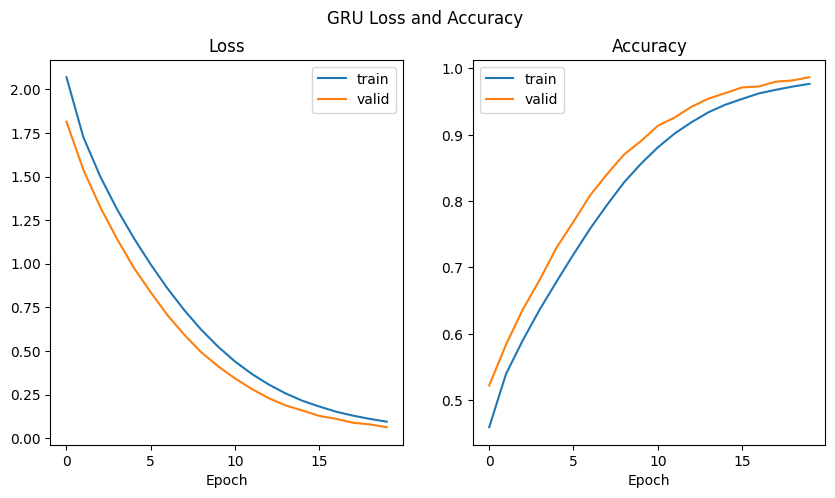

In [63]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    fig.suptitle("GRU Loss and Accuracy")
    ax1.plot(train_losses, label = "train")
    ax1.plot(valid_losses, label = "valid")
    ax1.title.set_text("Loss")
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.plot(train_accuracies, label = "train")
    ax2.plot(valid_accuracies, label = "valid")
    ax2.title.set_text("Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.legend()

<h4>Long Short-Term Memory</h4>

In [64]:
lstm = TextClassifier(vocab_size = len(vocab), embed_dim = 100, hidden_size = 32, output_size = 42, num_layers = 1, type_rnn = 'lstm').to(device)
loss_func = nn.CrossEntropyLoss()

In [65]:
train_losses, train_accuracies, valid_losses, valid_accuracies = [], [], [], []
for epoch in range(20):
    start = time.time()

    train_acc, train_loss = train_model(dls = train_dls, clf = lstm, opt = optim.Adam(params = lstm.parameters()), loss_fn = loss_func)
    valid_acc, valid_loss = evaluate_model(dls = valid_dls, clf = lstm, loss_fn = loss_func)

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)
    valid_accuracies.append(valid_acc)
    valid_losses.append(valid_loss)

    end = time.time()

    print(f'Epoch: {epoch + 1} train_acc: {train_acc:.3f} train_loss: {train_loss:.3f} valid_acc: {valid_acc:.3f} valid_loss: {valid_loss:.3f} time: {end - start:.3f} seconds')

Epoch: 1 train_acc: 0.282 train_loss: 2.814 valid_acc: 0.390 valid_loss: 2.320 time: 31.047 seconds
Epoch: 2 train_acc: 0.454 train_loss: 2.096 valid_acc: 0.522 valid_loss: 1.823 time: 30.516 seconds
Epoch: 3 train_acc: 0.538 train_loss: 1.741 valid_acc: 0.584 valid_loss: 1.553 time: 30.631 seconds
Epoch: 4 train_acc: 0.591 train_loss: 1.514 valid_acc: 0.638 valid_loss: 1.345 time: 30.942 seconds
Epoch: 5 train_acc: 0.635 train_loss: 1.332 valid_acc: 0.681 valid_loss: 1.169 time: 30.749 seconds
Epoch: 6 train_acc: 0.674 train_loss: 1.172 valid_acc: 0.719 valid_loss: 1.016 time: 30.717 seconds
Epoch: 7 train_acc: 0.714 train_loss: 1.029 valid_acc: 0.757 valid_loss: 0.883 time: 30.782 seconds
Epoch: 8 train_acc: 0.749 train_loss: 0.898 valid_acc: 0.792 valid_loss: 0.763 time: 30.690 seconds
Epoch: 9 train_acc: 0.782 train_loss: 0.781 valid_acc: 0.824 valid_loss: 0.648 time: 30.579 seconds
Epoch: 10 train_acc: 0.813 train_loss: 0.676 valid_acc: 0.851 valid_loss: 0.558 time: 30.526 seconds

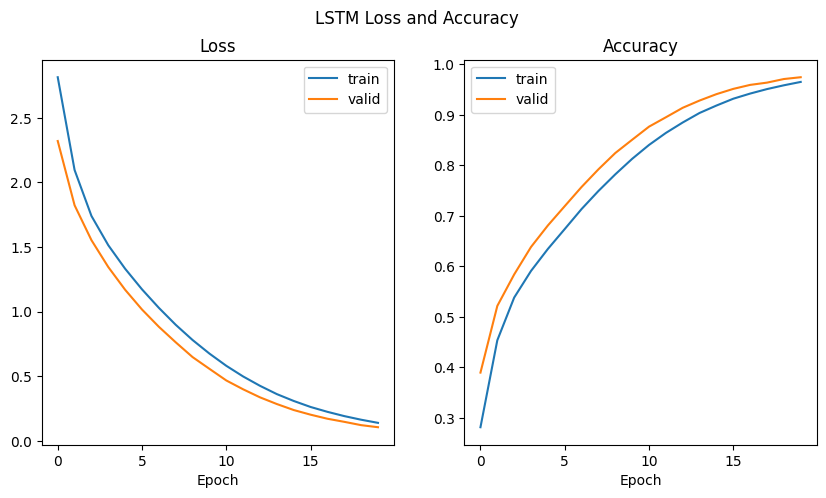

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle("LSTM Loss and Accuracy")
ax1.plot(train_losses, label = "train")
ax1.plot(valid_losses, label = "valid")
ax1.title.set_text("Loss")
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(train_accuracies, label = "train")
ax2.plot(valid_accuracies, label = "valid")
ax2.title.set_text("Accuracy")
ax2.set_xlabel("Epoch")
ax2.legend()